In this notebook I am going to investigate the optimization method:

## Fibbonacci

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Evaluating the function - graphing:

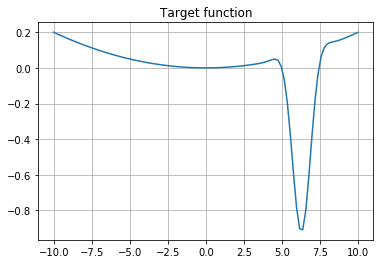

In [2]:
def target_function(x):
    return (-1)*np.cos(x)*np.exp(-(x-2*np.pi)**2) + 0.002*(x**2)

x = np.linspace(-10,10,100)
y = target_function(x)
plt.plot(x,y)
plt.title("Target function")
plt.grid()

The minumum is expected to be found circa at x = 6

### Writing expansion method:

The expansion method would not show efficiently a narrowed interval because the assumptions of the method were broken. The function (target_function) is not unimodal in the given interval, thus result is invalid. Thus the modified BDS method might be at help. Since the shape of the function is known, it is a good guess that expansion method will correctly identify an interval in which there is a minimum. A reasonable guess is that unimodality can be expected in the interval [5, 10] or [-10, 5]. However, minimum is in the latter.

In [3]:
def expansion_method(function, x_start, x_end, exp_coef, N):
    if function(x_start) == function(x_end):
        return [x_start, x_end]
    if function(x_start) < function(x_end):
        x_end = x_end*(-1)
        if function(x_start) <= function(x_end):
            return [x_end, (-1*x_end)]
    i = 0
    x_list = []
    x_list.append(x_start)
    x_list.append(x_end)
    while function(x_list[-1]*exp_coef) < function(x_list[-1]): 
        if i > N:
            return [0, 0]
        i += 1        
        x_end = exp_coef*x_end
        x_list.append(x_end)
    if x_list[-2] < x_list[-1]*exp_coef:
        return [x_list[-2], x_list[-1]*exp_coef]
    return [x_list[-1]*exp_coef, x_list[-2]]

def test_func(x):
    return x**4 + x**3 - x**2 + 2*x - 6

print("Expansion method for a test function: {}"
      .format(expansion_method(test_func, 0, 1.9, 2, 100)))
print("Expansion method for a target function: {}"
      .format(expansion_method(target_function, 5, 10, 1, 1000)))

Expansion method for a test function: [-3.8, 0]
Expansion method for a target function: [-10, 10]


An exemplary illustration of how basic version of expansion method does not produce a satisfying result - just as expected. Even narrowing the interval manually does not help.

### Improving results using modified expansion method:

In [4]:
def modified_expansion_method(function, x0, step, N):
    i = 0
    b = 0
    a = 0
    x_list = []
    x_list.append(x0)
    while True:
        x_list.append(x0 + (2**i)*step)
        i += 1
        if i > N:
            return [0, 0]
        if function(x_list[-1]) >= function(x_list[-2]):
            b = x_list[-1]
            i = 0
            break
    x_list = []
    x_list.append(x0)
    while True:
        x_list.append(x0 - (2**i)*step)
        i += 1
        if i > N:
            return [0, 0]
        if function(x_list[-1]) >= function(x_list[-2]):
            a = x_list[-1]
            break
    return [a,b]
print(modified_expansion_method(target_function, 5,0.1, 1000))
print(modified_expansion_method(target_function, 6,0.1, 1000))

[4.9, 8.2]
[5.9, 6.4]


The modified method narrows the solution quite efficiently as the assumption is satisfied.

### Constructing Fibonacci method:
Below the process of constructing the Fibonacci method is shown.

In [5]:
#test Fibonacci formula
def fib_formula(n):
    return (1/np.sqrt(5))*(((1+np.sqrt(5))/2)**n-((1-np.sqrt(5))/2)**n)

def find_closest_fibonacci(x):
    n = 0
    while fib_formula(n) <= x:
        n += 1
    return fib_formula(n), n
fib_list = []
for x in range(1,11):
    fib_list.append(fib_formula(x))
print("Sample Fibonacci numbers: \n{}"
      .format(np.round(fib_list)))
print("Test closest Fibonacci number to 11: \n{}"
      .format(np.round(find_closest_fibonacci(11))))

Sample Fibonacci numbers: 
[  1.   1.   2.   3.   5.   8.  13.  21.  34.  55.]
Test closest Fibonacci number to 11: 
[ 13.   7.]


In [6]:
def fibonacci_method(function, a, b, error):
    #find smallest integer that satisfies (b-a)/error < fibonacci(k)
    beta = (b-a)/float(error)
    phi_k, k = find_closest_fibonacci(beta) 
    phi_k2 = fib_formula(k-1)
    c = b - (phi_k2/phi_k)*(b - a)
    d = a + b - c
    for i in range(k-4):
        if function(c) < function(d):
            b = d
        else:
            a = c
        c = b - (fib_formula(k-2-i)/fib_formula(k-1-i))*(b - a)
        d = a + b - c 
    return c

In [7]:
x_star1 = fibonacci_method(target_function, -10,10,10e-10)
sol1 = target_function(x_star1)
x_star2 = fibonacci_method(target_function, -3,10,10e-20)
sol2 = target_function(x_star2)
print("No adjustment interval: \n {}, {} \nAdjusted interval: \n {}, {}"
      .format(x_star1, sol1, x_star2, sol2))

No adjustment interval: 
 -6.369995131260254e-16, -7.157165835186006e-18 
Adjusted interval: 
 6.27481807852428, -0.9211483054953369


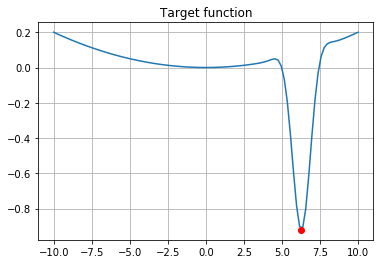

In [8]:
x_star = 6.27481807852428 
y_star = -0.9211483054953369
x = np.linspace(-10,10,100)
y = target_function(x)
plt.plot(x,y)
plt.plot(x_star, y_star, 'or')
plt.title("Target function")
plt.grid()
#Graphical confirmation of the found minimum

### Evaluation framework:

It is apparent that in case of vast intervals, Fibonacci method fails to find a correct approximation of optimal solution. 
In this particular case, if neither expansion method narrows an interval nor Fibonacci method finds an optimal solution in 
a given interval, therefore one must find a different approach. 

I will draw a random interval, such that it is contained within [-10, 10] interval. Then I will run the expansion method for that interval and then if it successfully finishes, the attempt of finding an optimal solution using Fibonacci method will be undertaken.

Minimum for BDS method: 
 -0.9211482557953629
Minimum for basic expansion method: 
 -0.8141770244030204


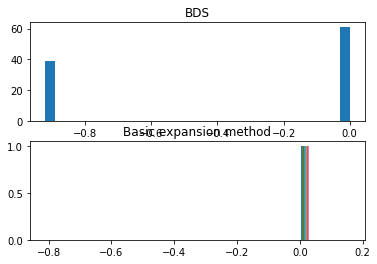

In [9]:
def draw_and_reverse():
    #ensure that x1 and x2 are two consequtively bigger numbers 
    x1, x2 = np.random.randint(-10, 10, size=(2,1))
    if x1 > x2:
        temp = x2
        x2 = x1
        x1 = temp
    return x1, x2

def n_runs(N, a, alpha, precision, method_pick):
    solutions = []
    x_stars = []
    n = 0
    while n < N:
        if method_pick == 1:
            x1, x2 = draw_and_reverse()
            x1p, x2p = expansion_method(target_function, x1, x2, alpha, 1000)
        else:
            x1 = np.random.randint(-10, 10)
            #here alpha is a step
            x1p, x2p = modified_expansion_method(target_function, x1, alpha, 1000)
        if abs(x1p) > a or abs(x2p) > a or (x1p == 0 and x2p == 0) :
            continue
        else:
            x_stars.append(fibonacci_method(target_function, x1p, x2p, precision))
            solutions.append(target_function(x_stars[-1]))
            n += 1
    return x_stars, solutions

x_stars0, solutions0 = n_runs(100, 10, 0.1, 10e-4, 1)
x_stars, solutions = n_runs(100, 10, 0.1, 10e-4, 0)
plt.subplot(2,1,1)
fig1 = plt.hist(solutions, bins=30)
plt.title("BDS")
plt.subplot(2,1,2)
plt.title("Basic expansion method")
fig2 = plt.hist(solutions0, bins=30)
print("Minimum for BDS method: \n {}".format(np.min(solutions)))
print("Minimum for basic expansion method: \n {}".format(np.min(solutions0)))

Graph above will change depending on the drawn points, therefore it should not be relied on. The effectiveness of the method can be represented by adjusting its parameters and verifying the error measure arising from the particular choice of these parameters. 
However, it running it multiple times revealed that there is a greater % of successful estimations in minima in case of modified expansion method

In case of Fibonacci method, there is only one parameter that indicated the precision of the method, therefore if set to a very low value, it will certainly result in a better approximation of the solution. However, expansion method does contain a parameter that determines the leap in each step, and this might be crucial for both optimal solution and time of operation.

#### The results presented are for 100 runs of the algorithm
#### Interval of used parameters is specified as variable *alpha_range*

List of best solutions in each iteration: 
[-7.1571658351860586e-18, -0.81417702440302042, -7.1571658351860586e-18, -7.1571658351866826e-18, -7.1571658351867858e-18, -7.1571658351867658e-18, -0.92114817847696351, -0.92114734086218708, -0.92114785421946377, -0.92114830227033051, -0.92114830344894705, -0.9211481432046289, -0.92114830179649787, -0.92114830543881698, -0.92114828829835582, -0.92114827813781874, -0.92114830547384563, -0.92114827925829101, -0.92114823231804233, -0.92114830549441251, -0.81417702440302042, -0.35298740830498354, -0.0046647736275396284, -7.1571658351860586e-18, -0.92114783616552653, -0.35298740830498354, -7.1571658351860586e-18, -7.1571658351860586e-18, -0.81417702440302042, -0.81417702440302042]


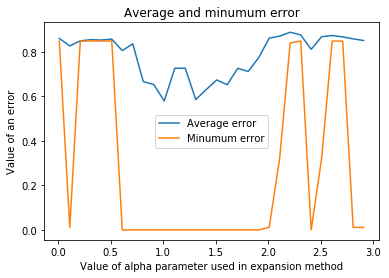

In [10]:
exact_solution = -0.9211483054953369
# I have assumed a previous result as an optimal solution 
# or a good approximation of it at least
def test_params(N, method, precision):
    average_error = []
    min_error = []
    champs = []
    alpha_range = [x for x in  np.arange(0.01, 3, 0.1)] #range of parameters
    for alpha in alpha_range:
        _, solutions = n_runs(N, 10, alpha, precision, method)
        champs.append(np.min(solutions))
        min_error.append((exact_solution - np.min(solutions))**2) #MSE
        average_error.append((exact_solution - np.mean(solutions))**2) #MSE
    return alpha_range, average_error, min_error, champs

x, avg_error, min_error, champs = test_params(100, 1, 10e-4)
plt.plot(x, avg_error)
plt.plot(x, min_error)
plt.title("Average and minumum error")
plt.legend(['Average error', 'Minumum error'])
plt.xlabel("Value of alpha parameter used in expansion method")
plt.ylabel("Value of an error")
print("List of best solutions in each iteration: \n{}".format(champs))

Below are the results of optimization process with modified expansion method. It proves that with BDS, Fibonacci method is always able to find a good approximation of the actual minimum within 100 runs of the algorithm.

List of best solutions in each iteration: 
[-0.92114830013383597, -0.92114830168845607, -0.92114830186249386, -0.92114830413915616, -0.92114830547765203, -0.92114800143409492, -0.9211482952326665, -0.92114814293929936, -0.92114793711221776, -0.9211483037055217, -0.92114825513982712, -0.92114823524431089, -0.92114830538615922, -0.92114826968728203, -0.92114830391470226, -0.92114813334849632, -0.92114808468251208, -0.92114829311639612, -0.92114786976650698, -0.92114829748070903, -0.9211482547010974, -0.92114830369509604, -0.92114829613092986, -0.92114803065997819, -0.92114827040002045, -0.92114813279938579, -0.9211482144547668, -0.92114818019253197, -0.92114830337455422, -0.92114830157289029]


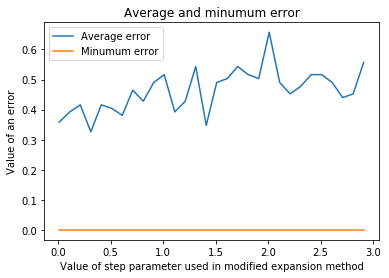

In [11]:
x, avg_error, min_error, champs = test_params(100, 0, 10e-4)
plt.plot(x, avg_error)
plt.plot(x, min_error)
plt.title("Average and minumum error")
plt.legend(['Average error', 'Minumum error'])
plt.xlabel("Value of step parameter used in modified expansion method")
plt.ylabel("Value of an error")
print("List of best solutions in each iteration: \n{}".format(champs))

Below I will investigate the influence of precision parameter in Fibonacci method, while keeping the step or *alpha* value constant. 

300
List of 10 best solutions in all iterations: 
[-0.92114827608249328, -0.92114827608249328, -0.92114818586515901, -0.92114666885165608, -0.92114666885165608, -0.92111661655555965, -0.92111661655555965, -0.92111661655555965, -0.92111661655555965, -0.92111661655555965]
List of 10 worst solutions in all iterations: 
[-0.81417702440302042, -0.81417702440302042, -0.81417702440302042, -0.81417702440302042, -0.81417702440302042, -0.81417702440302042, -0.81417702440302042, -0.81417702440302042, -0.81417702440302042, -0.81417702440302042]


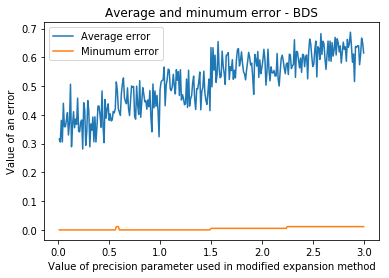

In [12]:
def test_params2(N, method):
    average_error = []
    min_error = []
    champs = []
    best_guess = []
    precision_range = [x for x in  np.arange(3, 10e-5, -0.01)] #range of parameters
    print(len(precision_range))
    for precision in precision_range:
        x_stars , solutions = n_runs(N, 10, 1.5, precision, method)
        champs.append(np.min(solutions))
        min_error.append((exact_solution - np.min(solutions))**2) #MSE
        average_error.append((exact_solution - np.mean(solutions))**2) #MSE
        best_guess.append(x_stars[solutions.index(champs[-1])])
    return precision_range, average_error, min_error, champs, best_guess

x, avg_error, min_error, champs, best_guess = test_params2(100, 0)
plt.plot(x, avg_error)
plt.plot(x, min_error)
plt.title("Average and minumum error - BDS")
plt.legend(['Average error', 'Minumum error'])
plt.xlabel("Value of precision parameter used in modified expansion method")
plt.ylabel("Value of an error")
champs.sort()
print("List of 10 best solutions in all iterations: \n{}".format(champs[0:10]))
print("List of 10 worst solutions in all iterations: \n{}".format(champs[-11:-1]))

300
List of 10 best solutions in all iterations: 
[-0.92114827608249328, -0.9211481858651589, -0.92114174185677244, -0.92114174185677244, -0.92114174185677244, -0.92114174185677244, -0.92114174185677244, -0.92114174185677233, -0.92114174185677233, -0.92114174185677233]
List of 10 worst solutions in all iterations: 
[-0.49368464573321907, -0.49368464573321907, -0.49368464573321907, -0.49368464573321907, -0.49368464573321907, -0.49368464573321907, -0.49368464573321907, -0.49368464573321907, -0.49368464573321907, -0.49368464573321907]


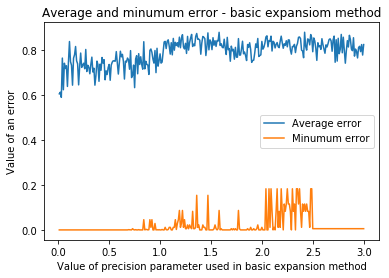

In [13]:
x, avg_error, min_error, champs, _ = test_params2(100, 1)
plt.plot(x, avg_error)
plt.plot(x, min_error)
plt.title("Average and minumum error - basic expansiom method")
plt.legend(['Average error', 'Minumum error'])
plt.xlabel("Value of precision parameter used in basic expansion method")
plt.ylabel("Value of an error")
champs.sort()
print("List of 10 best solutions in all iterations: \n{}".format(champs[0:10]))
print("List of 10 worst solutions in all iterations: \n{}".format(champs[-11:-1]))

### Verification of best set of solutions for BDS method:

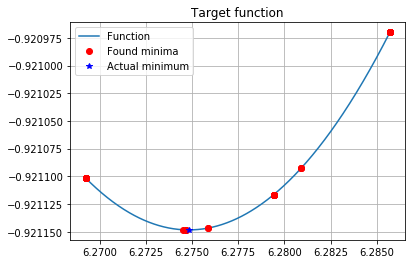

In [14]:
best_guess = [x for x in best_guess if x>6.26 and x<6.3] 
#take some close interval around the actual solution
x_max = np.max(best_guess)
x_min = np.min(best_guess)
x_star = 6.27481807852428 
y_star = -0.9211483054953369
ys = [target_function(x) for x in best_guess]
x = np.linspace(x_min, x_max,500)
y = target_function(x)
plt.plot(x,y)
plt.plot(best_guess,ys, 'or')
plt.plot(x_star, y_star, '*b')
plt.title("Target function")
plt.legend(['Function', 'Found minima', 'Actual minimum'])
plt.grid()
#Graphical confirmation of the found minima for BDS method only

Below is the function that aims to consequitively narrow the interval using BDS and then apply each time a Fibonacci method. As expected, solutions converge quickly.

6.2748188074 -0.921148305495


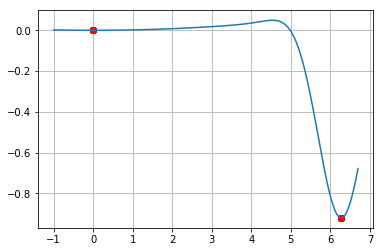

In [15]:
def narrow_consequtively():
    i = 0
    interval = []
    solutions = []
    x_stars = []
    x1 = np.random.randint(-10, 10)
    x1 = -10
    while i < 100:
        i += 1
        x1p, x2p = modified_expansion_method(target_function, x1 , 0.01, 1000)
        interval.append([x1p, x2p])
        x_stars.append(fibonacci_method(target_function, x1p, x2p, 10e-5))
        solutions.append(target_function(x_stars[-1]))
        x1 = x1p
        x2 = x2p
    return interval, x_stars, solutions

interval, x_stars, solutions = narrow_consequtively()
plt.plot(x_stars, solutions, 'or')
xp = np.linspace(-1, 6.7, 1000)
yp = [target_function(x) for x in xp]
plt.plot(xp,yp)
plt.grid()
print(x_stars[solutions.index(np.min(solutions))], np.min(solutions))

Above results provide an evidence to claim that the basic expansion method is more prone to random errors (probably due to process of drawing random interval) than BDS method. Moreover, there is a visible improvement in case of BDS method conjugated with Fibonacci method when the precision parameter is adjusted. There is no such visible trend for the basic expansion method

### Conclusions:
 * Fibonacci method provides an accurate approximation of the solution if there are enough investigated intervals
 * BDS method provides a superior interval narrowing compared to the basic version
 * Function for which the optimum is to be found must satisfy assumptions of methods used.
 * It is often very difficult and computationally challenging to find an optimal solution when interval is too large

##### By Jakub Mojsiejuk